In [ ]:
# 1) Preprocess & Clean Text

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import pickle
import os

from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
fake = pd.read_csv(r"C:\Users\Admin\Bharati_Pokale\24.02.2026\Dataset\Fake.csv")
true = pd.read_csv(r"C:\Users\Admin\Bharati_Pokale\24.02.2026\Dataset\True.csv")

fake["label"] = 0
true["label"] = 1

df = pd.concat([fake, true])

# shuffle
df = df.sample(frac=1, random_state=42)

print(df.shape)

(44898, 5)


In [3]:
df["content"] = df["title"] + " " + df["text"]

df = df[["content", "label"]]

In [4]:
stop_words = set(stopwords.words("english"))

def clean_text(text):
    
    text = text.lower()
    
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    words = text.split()
    
    words = [word for word in words if word not in stop_words]
    
    return " ".join(words)

df["content"] = df["content"].apply(clean_text)

In [6]:
vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(df["content"])

y = df["label"]

print("Feature shape:", X.shape)

Feature shape: (44898, 5000)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [8]:
lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

lr_acc = accuracy_score(y_test, lr_pred)

print("Logistic Regression Accuracy:", lr_acc)

print("\nClassification Report:\n")
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.9866369710467706

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4710
           1       0.98      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [9]:
nb = MultinomialNB()

nb.fit(X_train, y_train)

nb_pred = nb.predict(X_test)

nb_acc = accuracy_score(y_test, nb_pred)

print("Naive Bayes Accuracy:", nb_acc)

print("\nClassification Report:\n")
print(classification_report(y_test, nb_pred))

Naive Bayes Accuracy: 0.9311804008908686

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4710
           1       0.93      0.93      0.93      4270

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



In [10]:
svm = LinearSVC()

svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)

svm_acc = accuracy_score(y_test, svm_pred)

print("SVM Accuracy:", svm_acc)

print("\nClassification Report:\n")
print(classification_report(y_test, svm_pred))

SVM Accuracy: 0.994097995545657

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4710
           1       0.99      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [11]:
comparison = pd.DataFrame({
    
    "Model": [
        "Logistic Regression",
        "Naive Bayes",
        "SVM"
    ],
    
    "Accuracy": [
        lr_acc,
        nb_acc,
        svm_acc
    ]
})

comparison

,Model,Accuracy
0,Logistic Regression,0.986637
1,Naive Bayes,0.931180
2,SVM,0.994098


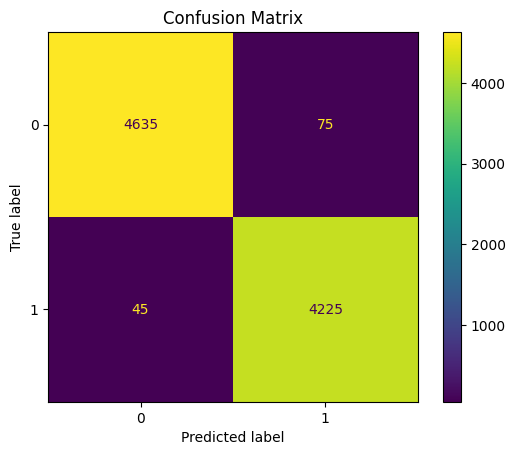

In [12]:
best_model_pred = lr_pred   # Logistic Regression best

cm = confusion_matrix(y_test, best_model_pred)

ConfusionMatrixDisplay(cm).plot()

plt.title("Confusion Matrix")

plt.show()

In [13]:
accuracies = {
    "Logistic Regression": lr_acc,
    "Naive Bayes": nb_acc,
    "SVM": svm_acc
}

best_model_name = max(accuracies, key=accuracies.get)

print("Best Model:", best_model_name)

Best Model: SVM


In [15]:
os.makedirs("models", exist_ok=True)

if best_model_name == "Logistic Regression":
    best_model = lr
    
elif best_model_name == "Naive Bayes":
    best_model = nb
    
else:
    best_model = svm

pickle.dump(best_model, open("models/model.pkl", "wb"))

pickle.dump(vectorizer, open("models/vectorizer.pkl", "wb"))

print("Best model saved successfully")

Best model saved successfully


In [16]:
def predict_news(text):
    
    text = clean_text(text)
    
    vector = vectorizer.transform([text])
    
    prediction = best_model.predict(vector)
    
    if prediction[0] == 0:
        return "Fake News"
    else:
        return "Real News"


predict_news("Government announced new policy")

'Fake News'